In [2]:
get_ipython().system('pip install tensorflow')
import tensorflow as tf


  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached grpcio-1.39.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth_oauthlib-0.4.5-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl 

In [4]:
#importing dataset
mnist=tf.keras.datasets.mnist #Here each number in the data set is of (28 x 28) means pixels will be of formed in matrix of 28x28

In [5]:
#Dividing the data into training and test dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()       # x_train contains inputs that is images of numbers and y_train contains the outputs

11501568/11490434 [==============================] - 2s 0us/step


In [6]:
print(x_train[0])       #Really important : The numbers ur getting below is representing a single number between 0 to 9 and all the bunch of numbers below which is shown are the
                        #pixels of that single number , understand

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

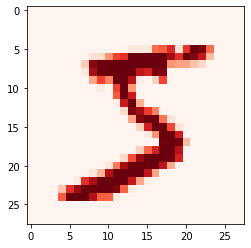

In [7]:
#for visualization purpose of above data (as above is not clear enough to understand) we use matplotlib library
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.Reds)
plt.show()


In [8]:
print(y_train[0])  #so here from training dataset the x and y values are matched

5


In [9]:
#Normalizing the data set to make the visuals clear
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
print(x_train[0])    #After normalization

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

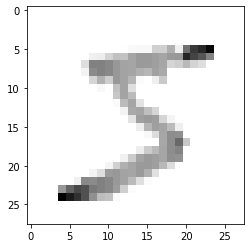

In [10]:
plt.imshow(x_train[0],cmap=plt.cm.binary)  # After normalizing
plt.show()

In [11]:
#Creating a sequential model which is feed forward model
model=tf.keras.models.Sequential()
#converting input from 28x28 to 1x784                        (28*28=784 i.e., which are flattening the image )
model.add(tf.keras.layers.Flatten())    #Adding input to model
#Addind neural network layers to the model
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#Adding the output layer which need to have 10 outputs (i.e., from 0 to 9)
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4) #Epochs means the number of times the program need to be ran

Epoch 1/4
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2535 - accuracy: 0.9228
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1060 - accuracy: 0.9669
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9772
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9833


In [12]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9715


In [13]:
#Making predictions
predictions=model.predict(x_test)
import numpy as np
print(np.argmax(predictions[0]))

7


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

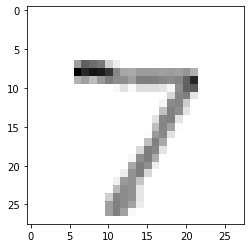

In [14]:
print(x_test[0])
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()